In [1]:
#Import required libraries.

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the insurance data.

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#OneHot encoding our data.

insurance_one_hot = pd.get_dummies(insurance, drop_first = True)

In [4]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
#create X and y values(Features and lables)

X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [6]:
#view

X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
#create training and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [10]:
#Build a neural network model.

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)])

In [11]:
#compile the model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

In [12]:
#fit the model.

insurance_model.fit(tf.expand_dims(X_train, axis = -1),
                    y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 12973.2344 - mae: 12973.2344
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11869.7539 - mae: 11869.7539
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11820.1123 - mae: 11820.1123
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11758.7109 - mae: 11758.7109
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11666.6621 - mae: 11666.6621
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11527.7422 - mae: 11527.7422
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11292.4004 - mae: 11292.4004
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10928.5820 - mae: 10928.5820
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10448.3135 - mae: 10448.3135
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9922.710

In [13]:
#check the result of insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 9027.7949 - mae: 9027.7949


[9027.794921875, 9027.794921875]

In [14]:
# Improving our tensorflow model by creating 3 layers.

tf.random.set_seed(42)

#create the model.

insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

In [15]:
#compile the model.

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])


In [16]:
#fit the model.

insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13332.2637 - mae: 13332.2637
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13304.6396 - mae: 13304.6396
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13251.6387 - mae: 13251.6387
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13153.6328 - mae: 13153.6328
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12990.5273 - mae: 12990.5273
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12748.3945 - mae: 12748.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12440.3555 - mae: 12440.3555
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12113.4688 - mae: 12113.4688
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 11860.8809 - mae: 11860.8809
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11766.55

In [17]:
#evalute the model.

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8619.5781 - mae: 8619.5781


[8619.578125, 8619.578125]

In [18]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9027.7949 - mae: 9027.7949


[9027.794921875, 9027.794921875]

In [19]:
#improving our model by training it for longer. no. of epochs = 200.

insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

In [20]:
#compile the model

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

In [21]:
#fit the model.

history = insurance_model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200, verbose = 0)

In [22]:
#Evaluate our model

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8622.2451 - mae: 8622.2451


[8622.2451171875, 8622.2451171875]

In [23]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8619.5781 - mae: 8619.5781


[8619.578125, 8619.578125]

Text(0.5, 0, 'epochs')

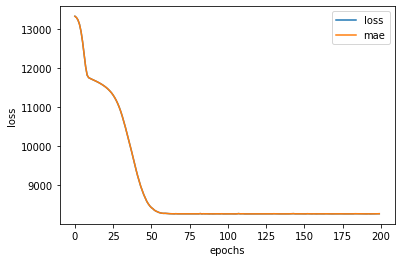

In [24]:
#plot history(also known as training curve or loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long should we train for ?

It depends on the problem you are workin on. However, many people have asked this question before. So, tensor flow has a solution to it. It is called **Early Stopping** which is  a Tensorflow component you can add to your model to stop training once it stop improving at certain metrics.

feature scaling:

there are two kinds of feature scaling we mainly look into.

1. Scale(also reffered to as normalization): converts all values to b/w 0 and 1 preserving the orignal distribution.

Scikit- learn function: MinMaxScaler.
used as default scaler with n/w.

2. Standardization: Removes the mean and divideds each value by the standard deviation.

scikit-learn function: StandardScaler.

when to use: Transform a feature to have close to normal distribution(caution: this reduces the effects of outliers.)

Note: In terms of scaling values n/w tends to prefer normalization.



In [25]:
#Data analysis.

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
#Read the insurance data

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [27]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [30]:
#create a column transformer

ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),
                            (OneHotEncoder(handle_unknown = 'ignore'),['sex','smoker','region']))

In [31]:
#Create X and y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [32]:
#Build our train and test sets.

from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
#fit the column transformer to our training data.

ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [35]:
#Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder.

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [36]:
#checking the status of our data

X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [37]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [38]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [39]:
#Build a n/w model to fit our normalized data

tf.random.set_seed(42)

In [40]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8, 100)            200       
                                                                 
 dense_3 (Dense)             (None, 8, 10)             1010      
                                                                 
 dense_4 (Dense)             (None, 8, 1)              11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Since insurance model 2 was the best model with no. of dense layers and hyper parameters,
#We are going to create model for normalized data with same attributes of insurance model 2.

insurance_model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

In [52]:
#compiling the model.

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

In [53]:
#fit the model

insurance_model_4.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 100, verbose = 0)

In [54]:
#evaluate our insurance model trained on normalized data.

insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8622.1836 - mae: 8622.1836


[8622.18359375, 8622.18359375]